In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [3]:
sample=pd.read_csv("sample_submission.csv")

In [4]:
store=pd.read_csv('store.csv')

In [5]:
sample

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [6]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
train=pd.read_csv('train[1].csv')

In [8]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [9]:
test=pd.read_csv('test[1].csv')

In [10]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

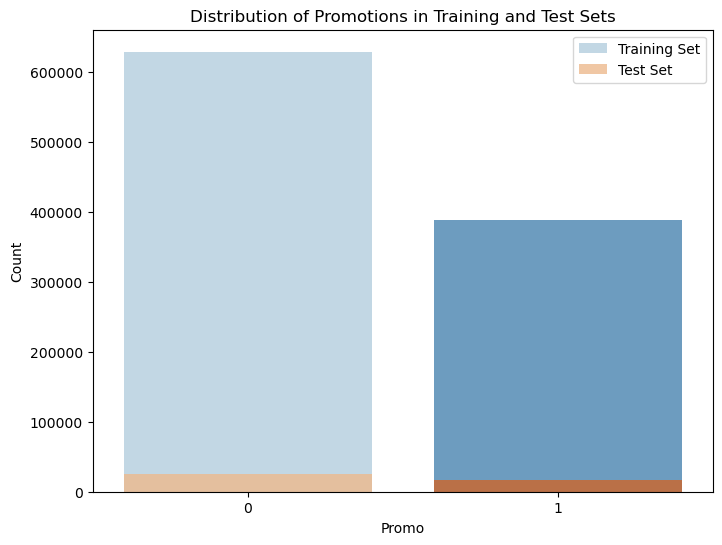

In [13]:

# Load the data
train = pd.read_csv('train[1].csv')
test = pd.read_csv('test[1].csv')

# Check the distribution of promotions in the training set
train_promo_counts = train['Promo'].value_counts()

# Check the distribution of promotions in the test set
test_promo_counts = test['Promo'].value_counts()

# Create a bar plot to visualize the distribution of promotions in both datasets
plt.figure(figsize=(8, 6))
sns.barplot(x=train_promo_counts.index, y=train_promo_counts.values, palette='Blues', alpha=0.8, label='Training Set')
sns.barplot(x=test_promo_counts.index, y=test_promo_counts.values, palette='Oranges', alpha=0.8, label='Test Set')
plt.xlabel('Promo')
plt.ylabel('Count')
plt.title('Distribution of Promotions in Training and Test Sets')
plt.legend()
plt.show()

### distribution in both training and test sets, the promotions are distributed similarly between these two groups

### ● Check & compare sales behavior before, during and after holidays

In [14]:
# Check unique values in the 'StateHoliday' column to identify holiday indicators
print(train['StateHoliday'].unique())

['0' 'a' 'b' 'c' 0]


In [15]:
 # Assuming '1' indicates holidays, create a new column 'Holiday' to indicate whether it's a holiday or not
train['Holiday'] = train['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)


In [16]:
# Split the data into three groups: before holiday, during holiday, and after holiday
before_holiday_sales = train[train['Holiday'] == 0]['Sales']
during_holiday_sales = train[train['Holiday'] == 1]['Sales']
after_holiday_sales = train[train['Holiday'].shift(-1) == 1]['Sales']  # Shift to identify after holiday

In [17]:
# Calculate the average sales for each group
average_sales_before_holiday = before_holiday_sales.mean()
average_sales_during_holiday = during_holiday_sales.mean()
average_sales_after_holiday = after_holiday_sales.mean()

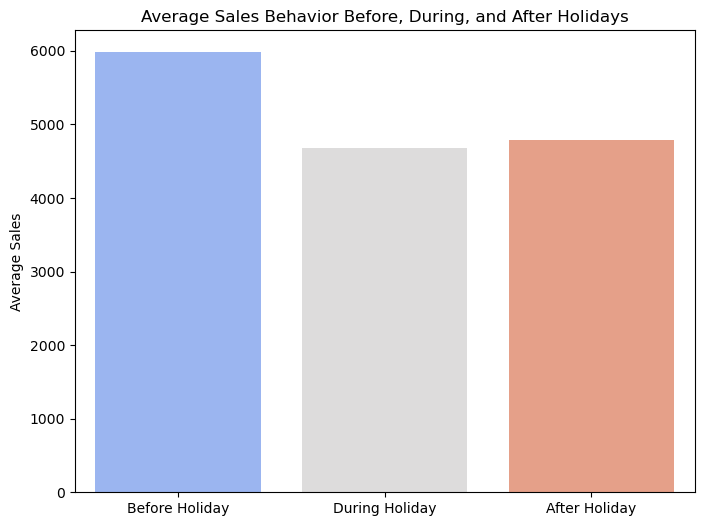

In [18]:
# Plot the average sales behavior before, during, and after holidays using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Holiday', 'During Holiday', 'After Holiday'],
            y=[average_sales_before_holiday, average_sales_during_holiday, average_sales_after_holiday],
            palette='coolwarm')
plt.title('Average Sales Behavior Before, During, and After Holidays')
plt.ylabel('Average Sales')
plt.show()

In [19]:
# Calculate the total sales for each group
total_sales_before_holiday = before_holiday_sales.sum()
total_sales_during_holiday = during_holiday_sales.sum()
total_sales_after_holiday = after_holiday_sales.sum()

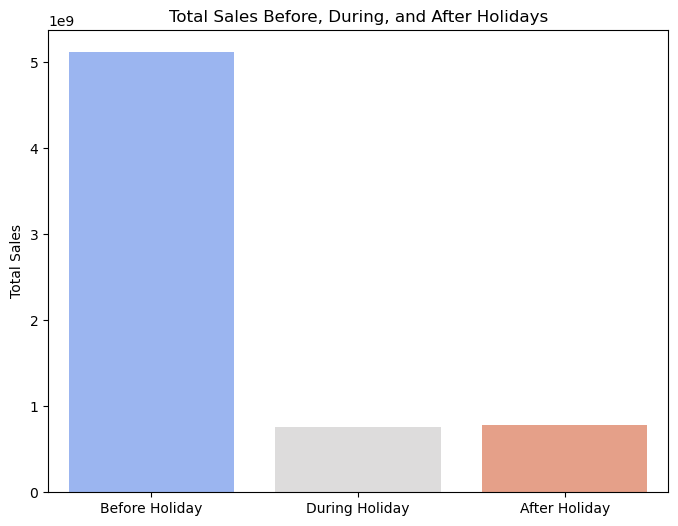

In [20]:
# Plot the total sales behavior before, during, and after holidays using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Holiday', 'During Holiday', 'After Holiday'],
            y=[total_sales_before_holiday, total_sales_during_holiday, total_sales_after_holiday],
            palette='coolwarm')
plt.title('Total Sales Before, During, and After Holidays')
plt.ylabel('Total Sales')
plt.show()

### Both average and total sales is more before holiday

### ● Find out any seasonal (Christmas, Easter etc) purchase behaviours,


In [21]:
# Assuming '1' indicates holidays, create a new column 'Holiday' to indicate whether it's a holiday or not
train['Holiday'] = train['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)


In [22]:
# Define functions to identify each occasion based on specific dates
def is_christmas(date):
    return date.month == 12 and date.day in [24, 25, 26, 27, 28, 29, 30, 31]

def is_easter(date):
    return date.month == 4 and date.day in [18, 19, 20, 21, 22, 23, 24, 25]

def is_valentines_day(date):
    return date.month == 2 and date.day in [14, 15]

def is_halloween(date):
    return date.month == 10 and date.day == 31

# Create new columns to indicate each occasion
train['Christmas'] = train['Date'].apply(lambda x: 1 if is_christmas(pd.to_datetime(x)) else 0)
train['Easter'] = train['Date'].apply(lambda x: 1 if is_easter(pd.to_datetime(x)) else 0)
train['ValentinesDay'] = train['Date'].apply(lambda x: 1 if is_valentines_day(pd.to_datetime(x)) else 0)
train['Halloween'] = train['Date'].apply(lambda x: 1 if is_halloween(pd.to_datetime(x)) else 0)

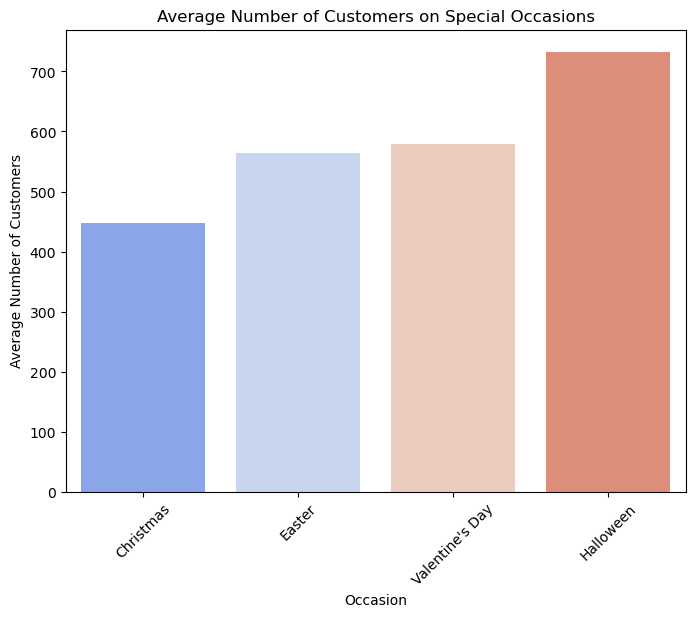

In [23]:


# Group the data by each occasion to calculate the average number of customers for each holiday
average_customers_christmas = train.groupby('Christmas')['Customers'].mean()
average_customers_easter = train.groupby('Easter')['Customers'].mean()
average_customers_valentines_day = train.groupby('ValentinesDay')['Customers'].mean()
average_customers_halloween = train.groupby('Halloween')['Customers'].mean()

# Create a bar plot for all occasions on the same plot (excluding 'Non-Holiday')
plt.figure(figsize=(8, 6))
sns.barplot(x=['Christmas', 'Easter', "Valentine's Day", 'Halloween'],
            y=[average_customers_christmas[1], average_customers_easter[1], average_customers_valentines_day[1], average_customers_halloween[1]],
            palette='coolwarm')
plt.title('Average Number of Customers on Special Occasions')
plt.xlabel('Occasion')
plt.ylabel('Average Number of Customers')
plt.xticks(rotation=45)
plt.show()


In [24]:
# Group the data by each occasion to calculate the average number of customers for each holiday
average_customers_occasions = train.groupby(['Christmas', 'Easter', 'ValentinesDay', 'Halloween'])['Customers'].mean().reset_index()

In [25]:
# Create a new DataFrame to combine the results for all occasions
occasion_data = pd.DataFrame(
    {
        'Occasion': ['Non-Holiday', 'Christmas', 'Easter', "Valentine's Day", 'Halloween'],
        'Average_Customers': [
            average_customers_occasions[average_customers_occasions['Christmas'] == 0]['Customers'].mean(),
            average_customers_occasions[average_customers_occasions['Christmas'] == 1]['Customers'].mean(),
            average_customers_occasions[average_customers_occasions['Easter'] == 1]['Customers'].mean(),
            average_customers_occasions[average_customers_occasions['ValentinesDay'] == 1]['Customers'].mean(),
            average_customers_occasions[average_customers_occasions['Halloween'] == 1]['Customers'].mean()
        ]
    }
)

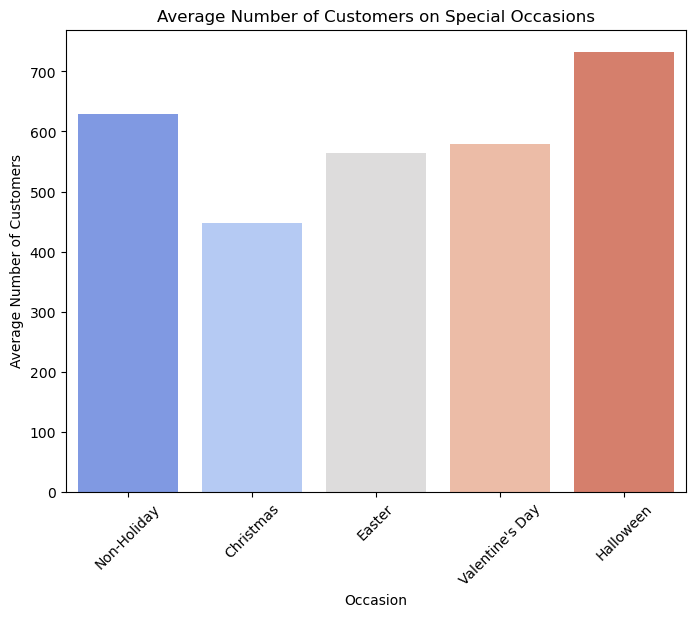

In [26]:

# Create a bar plot for all occasions on the same plot (excluding 'Non-Holiday')
plt.figure(figsize=(8, 6))
sns.barplot(x='Occasion', y='Average_Customers', data=occasion_data, palette='coolwarm')
plt.title('Average Number of Customers on Special Occasions')
plt.xlabel('Occasion')
plt.ylabel('Average Number of Customers')
plt.xticks(rotation=45)
plt.show()

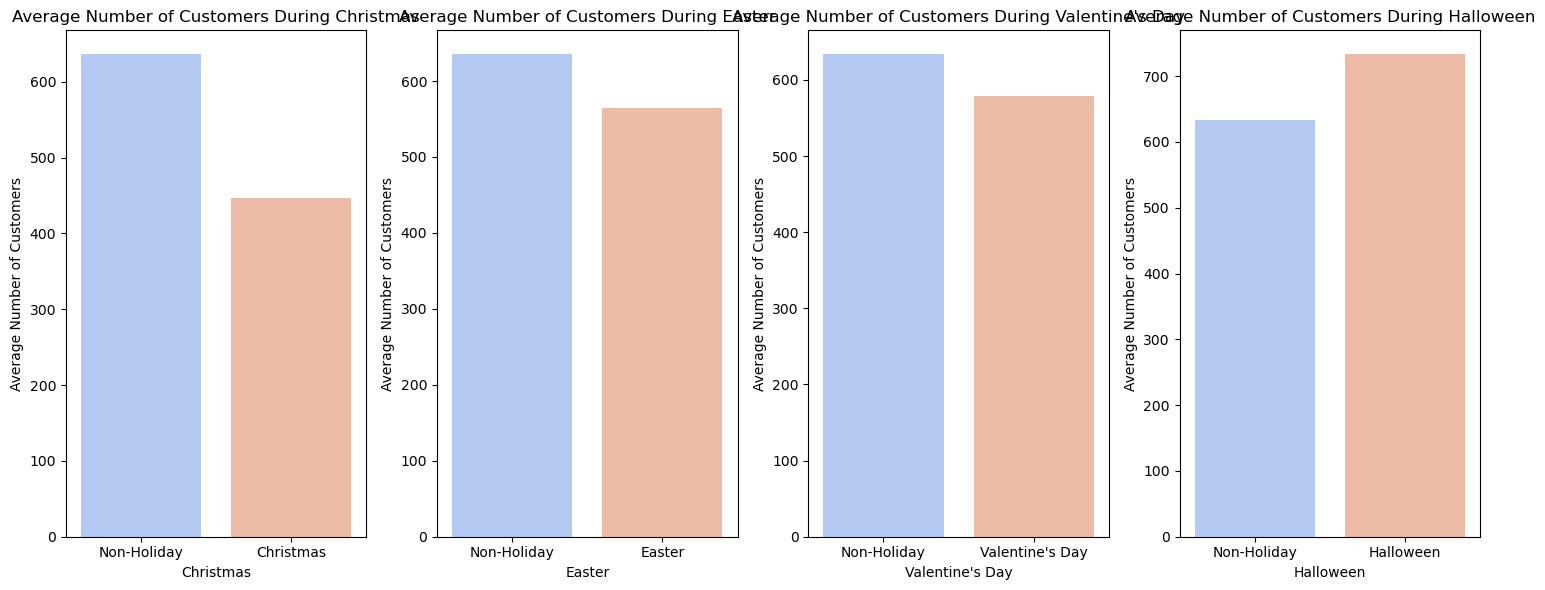

In [27]:
# Create separate bar plots for each occasion
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
sns.barplot(x=['Non-Holiday', 'Christmas'], y=[average_customers_christmas[0], average_customers_christmas[1]], palette='coolwarm')
plt.title('Average Number of Customers During Christmas')
plt.xlabel('Christmas')
plt.ylabel('Average Number of Customers')

plt.subplot(1, 4, 2)
sns.barplot(x=['Non-Holiday', 'Easter'], y=[average_customers_easter[0], average_customers_easter[1]], palette='coolwarm')
plt.title('Average Number of Customers During Easter')
plt.xlabel('Easter')
plt.ylabel('Average Number of Customers')

plt.subplot(1, 4, 3)
sns.barplot(x=['Non-Holiday', 'Valentine\'s Day'], y=[average_customers_valentines_day[0], average_customers_valentines_day[1]], palette='coolwarm')
plt.title('Average Number of Customers During Valentine\'s Day')
plt.xlabel('Valentine\'s Day')
plt.ylabel('Average Number of Customers')

plt.subplot(1, 4, 4)
sns.barplot(x=['Non-Holiday', 'Halloween'], y=[average_customers_halloween[0], average_customers_halloween[1]], palette='coolwarm')
plt.title('Average Number of Customers During Halloween')
plt.xlabel('Halloween')
plt.ylabel('Average Number of Customers')

plt.tight_layout()
plt.show()






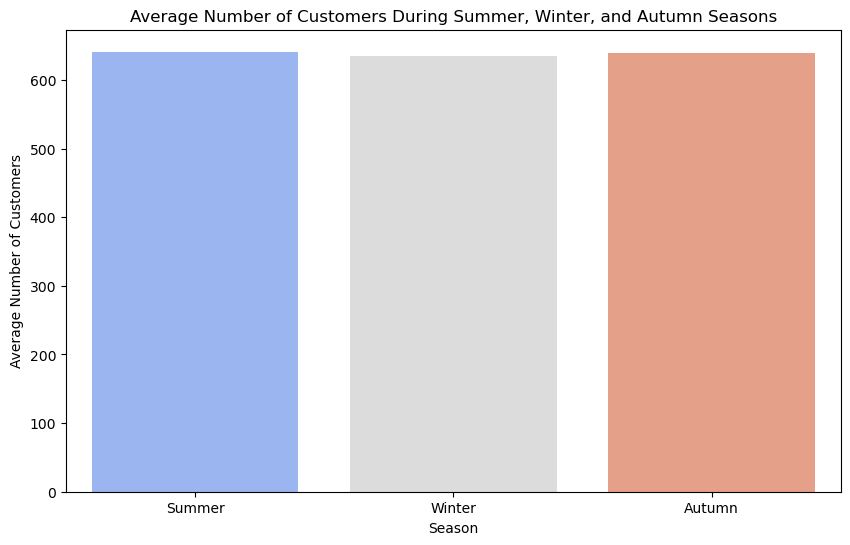

In [28]:


# Assuming '1' indicates holidays, create a new column 'Holiday' to indicate whether it's a holiday or not
train['Holiday'] = train['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

# Define functions to identify the summer, winter, and autumn seasons based on specific months
def is_summer(date):
    return date.month in [6, 7, 8]

def is_winter(date):
    return date.month in [12, 1, 2]

def is_autumn(date):
    return date.month in [9, 10, 11]

# Create new columns to indicate the summer, winter, and autumn seasons
train['Summer'] = train['Date'].apply(lambda x: 1 if is_summer(pd.to_datetime(x)) else 0)
train['Winter'] = train['Date'].apply(lambda x: 1 if is_winter(pd.to_datetime(x)) else 0)
train['Autumn'] = train['Date'].apply(lambda x: 1 if is_autumn(pd.to_datetime(x)) else 0)

# Group the data by each season to calculate the average number of customers for summer, winter, and autumn
average_customers_summer = train.groupby('Summer')['Customers'].mean()
average_customers_winter = train.groupby('Winter')['Customers'].mean()
average_customers_autumn = train.groupby('Autumn')['Customers'].mean()

# Create a bar plot for summer, winter, and autumn seasons on the same plot
plt.figure(figsize=(10, 6))
sns.barplot(x=['Summer', 'Winter', 'Autumn'],
            y=[average_customers_summer[1], average_customers_winter[1], average_customers_autumn[1]],
            palette='coolwarm')
plt.title('Average Number of Customers During Summer, Winter, and Autumn Seasons')
plt.xlabel('Season')
plt.ylabel('Average Number of Customers')
plt.show()


In [29]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Holiday,Christmas,Easter,ValentinesDay,Halloween,Summer,Winter,Autumn
0,1,5,2015-07-31,5263,555,1,1,0,1,0,0,0,0,0,1,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,0,0,0,0,0,1,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,0,0,0,1,0,0


### ● What can you say about the correlation between sales and number of customers?

Correlation between Sales and Customers: 0.89


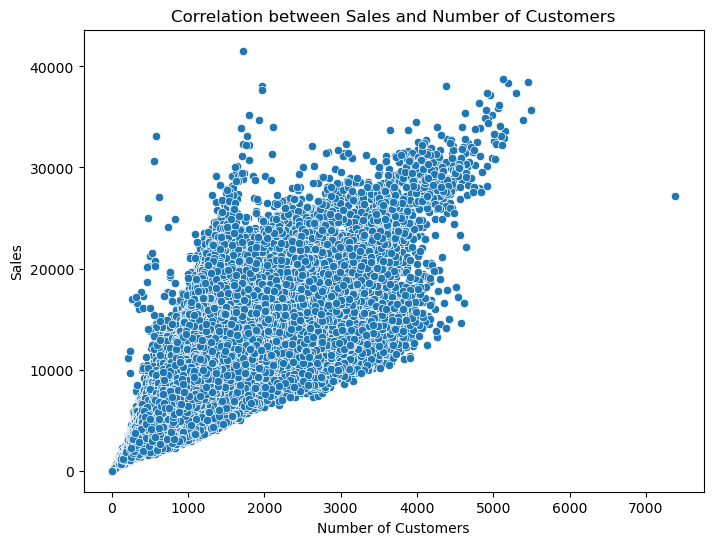

In [30]:


# Calculate the correlation coefficient between 'Sales' and 'Customers'
correlation = train['Sales'].corr(train['Customers'])

# Print the correlation coefficient
print(f"Correlation between Sales and Customers: {correlation:.2f}")

# Plot a scatter plot to visualize the relationship between 'Sales' and 'Customers'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customers', y='Sales', data=train)
plt.title('Correlation between Sales and Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()


In [53]:
# Correlation between promo and sales
train[['Promo','Sales']].corr()

,Promo,Sales
Promo,1.000000,0.452345
Sales,0.452345,1.000000


In [55]:
# Correlation between Sales and number of customers
train[['Customers','Sales']].corr()

,Customers,Sales
Customers,1.000000,0.894711
Sales,0.894711,1.000000


In [56]:
# Correlation between promo, Customers and sales
train[['Promo', 'Customers','Sales']].corr()

,Promo,Customers,Sales
Promo,1.000000,0.316169,0.452345
Customers,0.316169,1.000000,0.894711
Sales,0.452345,0.894711,1.000000


In [58]:
promo_sale = train[['Promo','Sales']].groupby('Promo').mean().reset_index()
promo_sale

,Promo,Sales
0,0,4406.050805
1,1,7991.152046


In [59]:
def barPlot(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    #plt.bar(color ='maroon', width = 0.8)
    plt.show()

### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


In [31]:
# Create a new column 'PromoDay' to indicate whether it's a promotional day (1) or not (0)
train['PromoDay'] = train['Promo'].apply(lambda x: 1 if x == 1 else 0)

In [32]:
# Group the data by 'PromoDay' to calculate the average sales and average number of customers
average_sales_promo = train.groupby('PromoDay')['Sales'].mean()
average_customers_promo = train.groupby('PromoDay')['Customers'].mean()

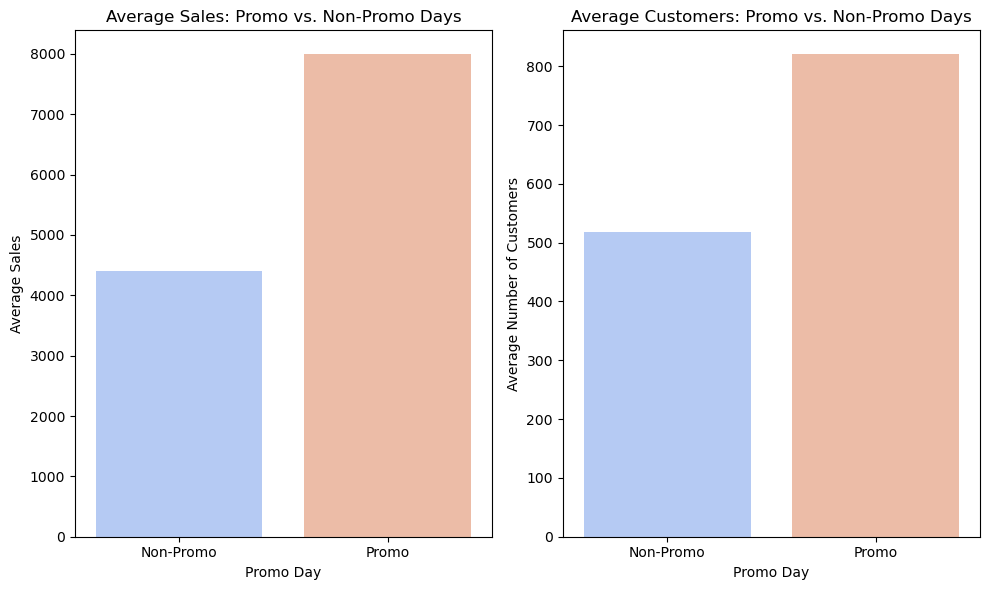

In [33]:
# Create bar plots to compare average sales and average customers during promotional and non-promotional days
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=['Non-Promo', 'Promo'], y=[average_sales_promo[0], average_sales_promo[1]], palette='coolwarm')
plt.title('Average Sales: Promo vs. Non-Promo Days')
plt.xlabel('Promo Day')
plt.ylabel('Average Sales')

plt.subplot(1, 2, 2)
sns.barplot(x=['Non-Promo', 'Promo'], y=[average_customers_promo[0], average_customers_promo[1]], palette='coolwarm')
plt.title('Average Customers: Promo vs. Non-Promo Days')
plt.xlabel('Promo Day')
plt.ylabel('Average Number of Customers')

plt.tight_layout()
plt.show()

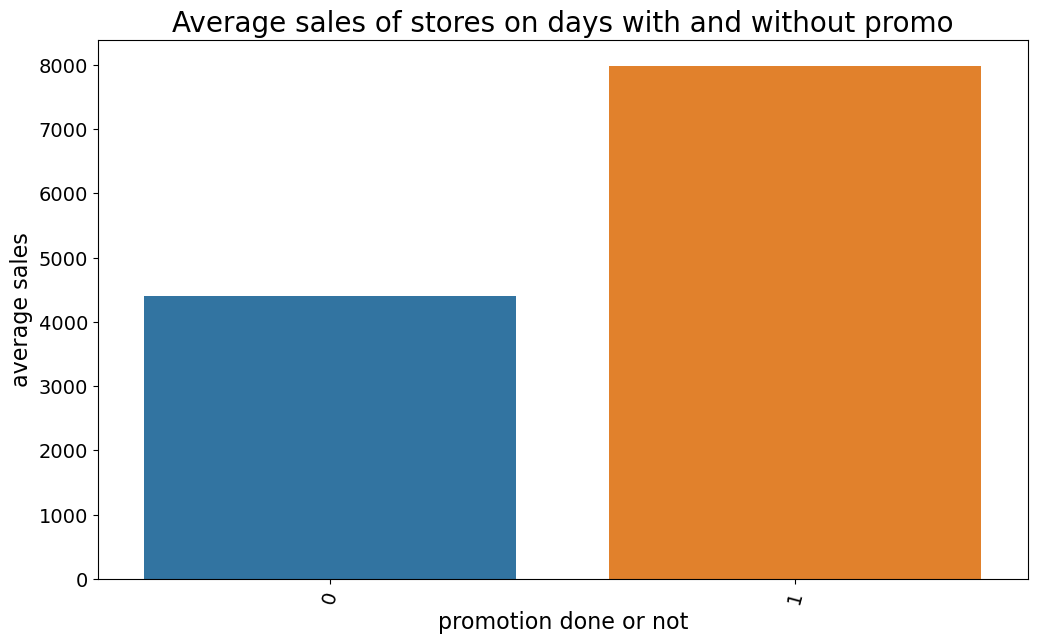

In [60]:
barPlot(promo_sale,'Promo', 'Sales', 'Average sales of stores on days with and without promo',\
        'promotion done or not', 'average sales')

In [62]:
promo_data = train[['Store', 'Promo', 'Sales']].groupby('Store').mean().sort_values(['Sales'], \
          ascending=True).reset_index()
promo_data.describe()

,Store,Promo,Sales
count,1115.00000,1115.000000,1115.000000
mean,558.00000,0.381382,5763.320541
std,322.01708,0.001788,2046.447377
min,1.00000,0.377309,2244.503185
25%,279.50000,0.382166,4412.415567
50%,558.00000,0.382166,5459.185775
75%,836.50000,0.382166,6633.871550
max,1115.00000,0.382572,20718.515924


In [64]:
# stores opened in weekdays (open = 1)
week_data = train[['Store', 'DayOfWeek','Open', 'Sales','Customers']]
week_data = week_data[week_data['Open'] == 1]
storeW_data = week_data[['Store', 'DayOfWeek']].groupby('Store').nunique()
storeW_data = storeW_data[storeW_data['DayOfWeek'] == 7].reset_index()
storeW_data

,Store,DayOfWeek
0,85,7
1,122,7
2,209,7
3,259,7
4,262,7
5,274,7
6,299,7
7,310,7
8,335,7
9,353,7


In [65]:
weekends_data = week_data[week_data['Store'].isin(set(week_data['Store']))]
weekends_data.head()

,Store,DayOfWeek,Open,Sales,Customers
0,1,5,1,5263,555
1,2,5,1,6064,625
2,3,5,1,8314,821
3,4,5,1,13995,1498
4,5,5,1,4822,559


In [66]:
wg = weekends_data[['DayOfWeek','Sales','Customers']].groupby('DayOfWeek').mean()
wg

,Sales,Customers
DayOfWeek,,
1,8216.073074,855.444984
2,7088.113656,769.986753
3,6728.122978,740.598876
4,6767.310159,755.569784
5,7072.677012,781.771639
6,5874.840238,660.177526
7,8224.723908,1441.532424


#### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [40]:
sample.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [41]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [46]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [50]:
store.shape

(1115, 10)

In [51]:
train.shape

(1017209, 18)

In [47]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Holiday', 'Christmas', 'Easter',
       'ValentinesDay', 'Halloween', 'Summer', 'Winter', 'Autumn', 'PromoDay'],
      dtype='object')

In [42]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Holiday,Christmas,Easter,ValentinesDay,Halloween,Summer,Winter,Autumn,PromoDay
0,1,5,2015-07-31,5263,555,1,1,0,1,0,0,0,0,0,1,0,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,0,0,0,1,0,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,0,0,0,1,0,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,0,0,0,0,0,1,0,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,0,0,0,1,0,0,1


In [48]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [49]:
# Analyze Promotion Effectiveness:

# Assuming you have loaded the data and calculated the ROI as mentioned before
plt.figure(figsize=(8, 6))
sns.barplot(x='Promotion', y='ROI', data=data)
plt.title('ROI of Different Promotions')
plt.xlabel('Promotion Type')
plt.ylabel('ROI')
plt.show()

NameError: name 'data' is not defined

<Figure size 800x600 with 0 Axes>